In [14]:
using QuantumOptics
using PyPlot
using Statistics
using LinearAlgebra
using CollectiveSpins

### Defining the system

In [15]:
# Define geometry of system
Nx,Ny,Nz = [2,1,1]
N = Nx*Ny*Nz;
d_xy, d_z = 266., 532. # Optical lattice spacing in nm

# Define computation variables
λl = 1299.
Γ0 = 1. # SE decay rate

a_dim,b_dim,c_dim = [d_xy,d_xy,d_z]/λl
geo = CollectiveSpins.geometry.box(a_dim,b_dim,c_dim;Nx=Nx,Ny=Ny,Nz=Nz)
e = [0,0,1]   # Quantization axis
system = CollectiveSpins.SpinCollection(geo, e, gammas=1.)

# Initial state
phi_array = zeros(N)
theta_array = zeros(N)

# Integration time
Tstep, Tend = 1e-3, 1 # Normalised by Γ0
T = [0:Tstep:Tend;];

# Full Quantum

In [16]:
# Bases
b1 = SpinBasis(1//2)
bMB = CompositeBasis([b1 for i = 1:N])

# Operators
σx = sigmax(b1)
σy = sigmay(b1)
σz = sigmaz(b1)
Jx = sum([embed(bMB, i, σx) for i = 1:N])
Jy = sum([embed(bMB, i, σy) for i = 1:N])
Jz = sum([embed(bMB, i, σz) for i = 1:N]);

In [17]:
# Prepare the initial state
Ψ0 = CollectiveSpins.quantum.blochstate(phi_array, theta_array)
ρt = CollectiveSpins.quantum.timeevolution(T, system, Ψ0)[2];

In [18]:
mean_sx = [real(expect(Jx, ρ))./N for ρ in ρt]
mean_sy = [real(expect(Jy, ρ))./N for ρ in ρt]
mean_sz = [real(expect(Jz, ρ))./N for ρ in ρt]
mean_sz67 = -1 .*(mean_sz.+1) ./2 .- 6;

# MF

In [19]:
Ψ0_MF = CollectiveSpins.meanfield.blochstate(phi_array, theta_array)
ρt_MF = CollectiveSpins.meanfield.timeevolution(T, system, Ψ0_MF)[2];

In [20]:
mean_sx_MF = [mean(CollectiveSpins.meanfield.sx(ρ)) for ρ in ρt_MF]
mean_sy_MF = [mean(CollectiveSpins.meanfield.sy(ρ)) for ρ in ρt_MF]
mean_sz_MF = [mean(CollectiveSpins.meanfield.sz(ρ)) for ρ in ρt_MF]
mean_sz67_MF = -1 .*(mean_sz_MF.+1) ./2 .- 6;

# MPC

In [21]:
Ψ0_MPC = CollectiveSpins.mpc.blochstate(phi_array, theta_array)
ρt_MPC = CollectiveSpins.mpc.timeevolution(T, system, Ψ0_MPC)[2];

In [22]:
mean_sx_MPC = [mean(CollectiveSpins.mpc.sx(ρ)) for ρ in ρt_MPC]
mean_sy_MPC = [mean(CollectiveSpins.mpc.sy(ρ)) for ρ in ρt_MPC]
mean_sz_MPC = [mean(CollectiveSpins.mpc.sz(ρ)) for ρ in ρt_MPC]
mean_sz67_MPC = -1 .*(mean_sz_MPC.+1) ./2 .- 6;

# Indep case

In [23]:
# Compute in the independent case
Ψ0_ind = CollectiveSpins.independent.blochstate(phi_array[1], theta_array[1], N)
ρt_ind = CollectiveSpins.independent.timeevolution(T, system, Ψ0_ind, dt=Tstep)[2];

In [24]:
mean_sx_ind = [mean(CollectiveSpins.independent.sx(ρ)) for ρ in ρt_ind]
mean_sy_ind = [mean(CollectiveSpins.independent.sy(ρ)) for ρ in ρt_ind]
mean_sz_ind = [mean(CollectiveSpins.independent.sz(ρ)) for ρ in ρt_ind]
mean_sz67_ind = -1 .*(mean_sz_ind.+1) ./2 .- 6;

# Plots

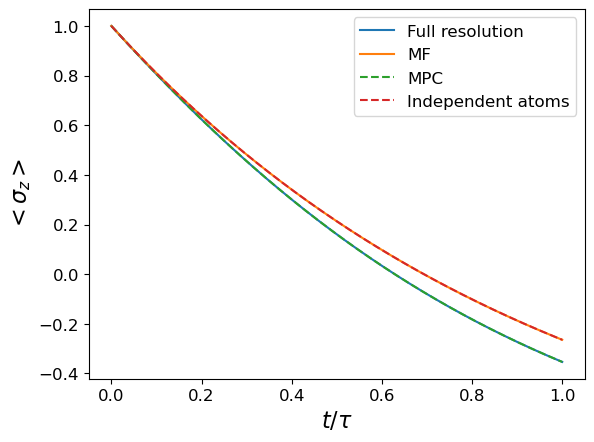

In [25]:
close("all")
figure()

PyPlot.rc("font", size = 12)

plot(T, mean_sz, label="Full resolution")
plot(T, mean_sz_MF, label="MF")
plot(T, mean_sz_MPC, label="MPC", linestyle="--")

plot(T, mean_sz_ind, label=string("Independent atoms"), linestyle="--")

xlabel(L"t/\tau", fontsize=16)
ylabel(L"<σ_z>", fontsize=16)
legend()

savefig("/Users/remy/Documents/Remy/ENSL_2024_2025/Stage_M2/Rapport_Stage_M2/Figures/Comparison_Q_MF_MPC_1D.pdf", bbox_inches="tight")

pygui(false); gcf()

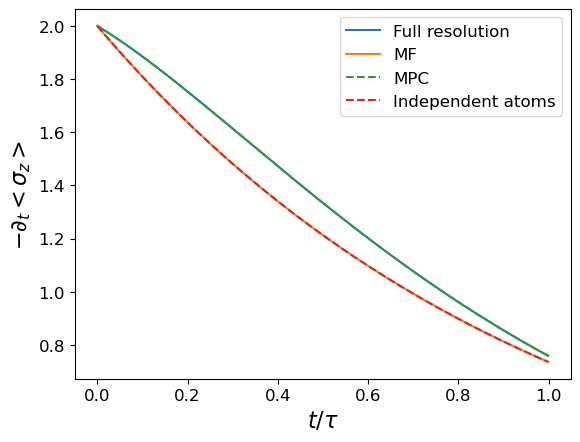

In [26]:
close("all")
figure()

PyPlot.rc("font", size = 12)

plot(T[1:end-1], -diff(mean_sz)./Tstep, label="Full resolution")
plot(T[1:end-1], -diff(mean_sz_MF)./Tstep, label="MF")
plot(T[1:end-1], -diff(mean_sz_MPC)./Tstep, label="MPC", linestyle="--")

plot(T[1:end-1], -diff(mean_sz_ind)./Tstep, label=string("Independent atoms"), linestyle="--")

xlabel(L"t/\tau", fontsize=16)
ylabel(L"-\partial_t<σ_z>", fontsize=16)
legend()

savefig("/Users/remy/Documents/Remy/ENSL_2024_2025/Stage_M2/Rapport_Stage_M2/Figures/Comparison_Q_MF_MPC_diff_1D.pdf", bbox_inches="tight")

pygui(false); gcf()